# A Study on Multivariate State Space Model

A model fits with local trend and global trend.

In [397]:
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing
multiprocessing.set_start_method("fork", force=True)

from orbit.utils.stan import get_compiled_stan_model_simplified, compile_stan_model_simplified
import arviz as az

## Data

Run the `load_data` first after downloading the data from kaggle m5 homepage.

In [343]:
raw_data = pd.read_csv("../../m5_study/clean/response_df.csv")

In [344]:
raw_data.head(5)

,HOBBIES_1_001_CA_1,HOBBIES_1_002_CA_1,HOBBIES_1_003_CA_1,HOBBIES_1_004_CA_1,HOBBIES_1_005_CA_1,HOBBIES_1_006_CA_1,HOBBIES_1_007_CA_1,HOBBIES_1_008_CA_1,HOBBIES_1_009_CA_1,HOBBIES_1_010_CA_1,...,FOODS_3_820_WI_3,FOODS_3_821_WI_3,FOODS_3_822_WI_3,FOODS_3_823_WI_3,FOODS_3_824_WI_3,FOODS_3_825_WI_3,FOODS_3_826_WI_3,FOODS_3_827_WI_3,d,date
0,0,0,0,0,0,0,0,12,2,0,...,1,0,4,0,0,0,0,0,d_1,2011-01-29
1,0,0,0,0,0,0,0,15,0,0,...,1,0,4,0,0,6,0,0,d_2,2011-01-30
2,0,0,0,0,0,0,0,0,7,1,...,1,0,2,2,0,0,0,0,d_3,2011-01-31
3,0,0,0,0,0,0,0,0,3,0,...,1,0,5,2,0,2,0,0,d_4,2011-02-01
4,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,2,0,0,d_5,2011-02-02


In [390]:
raw_y = np.transpose(raw_data[['FOODS_3_821_WI_3', 'FOODS_3_822_WI_3', 'FOODS_3_823_WI_3']].values, (1, 0))
# for test purpose just use last 50 points
raw_y = raw_y[:, -50:]
normalizer_y = np.clip(np.mean(raw_y, -1), a_min=0.1, a_max=np.inf).reshape(-1, 1)
y = raw_y / normalizer_y
sdy = np.std(y, -1)
num_of_series, num_of_steps = y.shape

# A Full Rank Matrix Approach

In [399]:
ss_model_path = "../stan/ss_multivariate.stan"
compiled_path = compile_stan_model_simplified(ss_model_path)
ss_mod = get_compiled_stan_model_simplified(compiled_path)
del compiled_path

In [391]:
data = {
    'NUM_OF_STEPS': num_of_steps,
    'NUM_OF_SERIES': num_of_series,
    'Y' : y,
    'A1' : np.zeros(num_of_series + 1),
    'P1' : np.zeros(num_of_series + 1),
    'STATE_SIGMA_MEAN': np.ones(num_of_series + 1),
    'STATE_SIGMA_SD': np.ones(num_of_series + 1),
    'OBS_SIGMA_MEAN': np.ones(num_of_series),
    'OBS_SIGMA_SD':  np.ones(num_of_series),
}

In [392]:
ss_fit = ss_mod.sampling(
    data=data,
    warmup=4000,
    iter=5000,
    chains=4,
)


Gradient evaluation took 0.000751 seconds
1000 transitions using 10 leapfrog steps per transition would take 7.51 seconds.
Adjust your expectations accordingly!




Gradient evaluation took 0.000684 seconds
1000 transitions using 10 leapfrog steps per transition would take 6.84 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.000892 seconds
1000 transitions using 10 leapfrog steps per transition would take 8.92 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000687 seconds
1000 transitions using 10 leapfrog steps per transition would take 6.87 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: multiply: B[1] is nan, but must not be nan!  (in 'unknown file name' at line 69)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: multiply: B[1] is nan, but must not be nan!  (in 'unknown file name' at line 69)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration: 1000 / 5000 [ 20%]  (Warmup)
Iteration: 1000 / 5000 [ 20%]  (Warmup)
Iteration: 1000 / 5000 [ 20%]  (Warmup)
Iteration: 1000 / 5000 [ 20%]  (Warmup)
Iteration: 1500 / 5000 [ 30%]  (Warmup)
Iteration: 1500 / 5000 [ 30%]  (Warmup)
Iteration: 1500 / 5000 [ 30%]  (Warmup)
Iteration: 1500 / 5000 [ 30%]  (Warmup)
Iteration: 2000 / 5000 [ 40%]  (Warmup)
Iteration: 2000 / 5000 [ 40%]  (Warmup)
Iteration: 2000 / 5000 [ 40%]  (Warmup)
Iteration: 2500 / 5000 [ 50%]  (Warmup)
Iteration: 2000 / 5000 [ 40%]  (Warmup)
Iteration: 2500 / 5000 [ 50%]  (Warmup)
Iteration: 2500 / 5000 [ 50%]  (Warmup)
Iteration: 3000 / 5000 [ 60%]  (Warmup)
Iteration: 2500 / 5000 [ 50%]  (Warmup)
Iteration: 3000 / 5000 [ 60%]  (Warmup)
Iteration: 3500 / 5000 [ 70%]  (Warmup)
Iteration: 3000 / 5000 [ 60%]  (Warmup)
Iteration: 3000 / 5000 [ 60%]  (Warmup)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


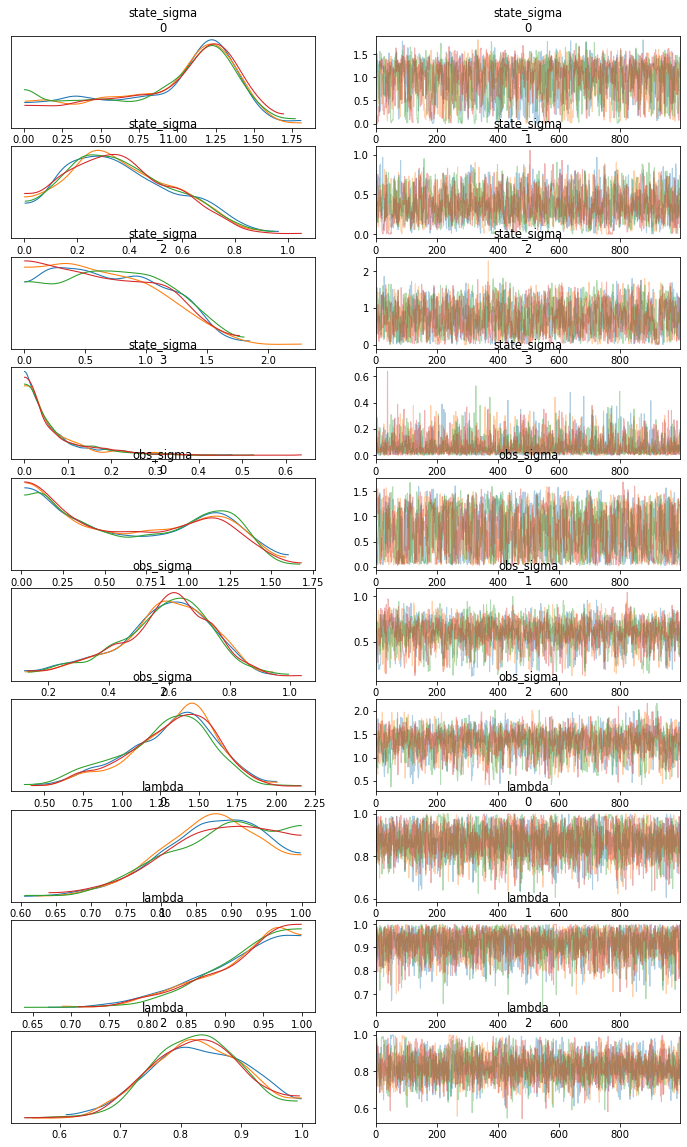

In [410]:
az_posteriors = az.from_pystan(ss_fit)
axes = az.plot_trace(az_posteriors, var_names=['state_sigma', 'obs_sigma', 'lambda'], compact=False);

In [417]:
ss_posteriors = ss_fit.extract(pars=['state_sigma', 'a', 'obs_sigma', 'lambda'], permuted=True)
# exclude last step and last states
loc_states = ss_posteriors['a'][:, :-1, :-1]
glb_states = np.expand_dims(ss_posteriors['a'][:, :-1, 0], -1)
lambda_ = np.expand_dims(ss_posteriors['lambda'], 1)

In [421]:
states = loc_states + glb_states
yhat = np.power(np.clip(1 + lambda_ * states, a_min=0, a_max=np.inf), 1 / lambda_) * normalizer_y.reshape(1, 1, num_of_series)
yhat = yhat.transpose(0, 2, 1)
yhat_upper, yhat_med, yhat_lower = np.quantile(yhat, q=[0.9, 0.5, 0.1], axis=0)

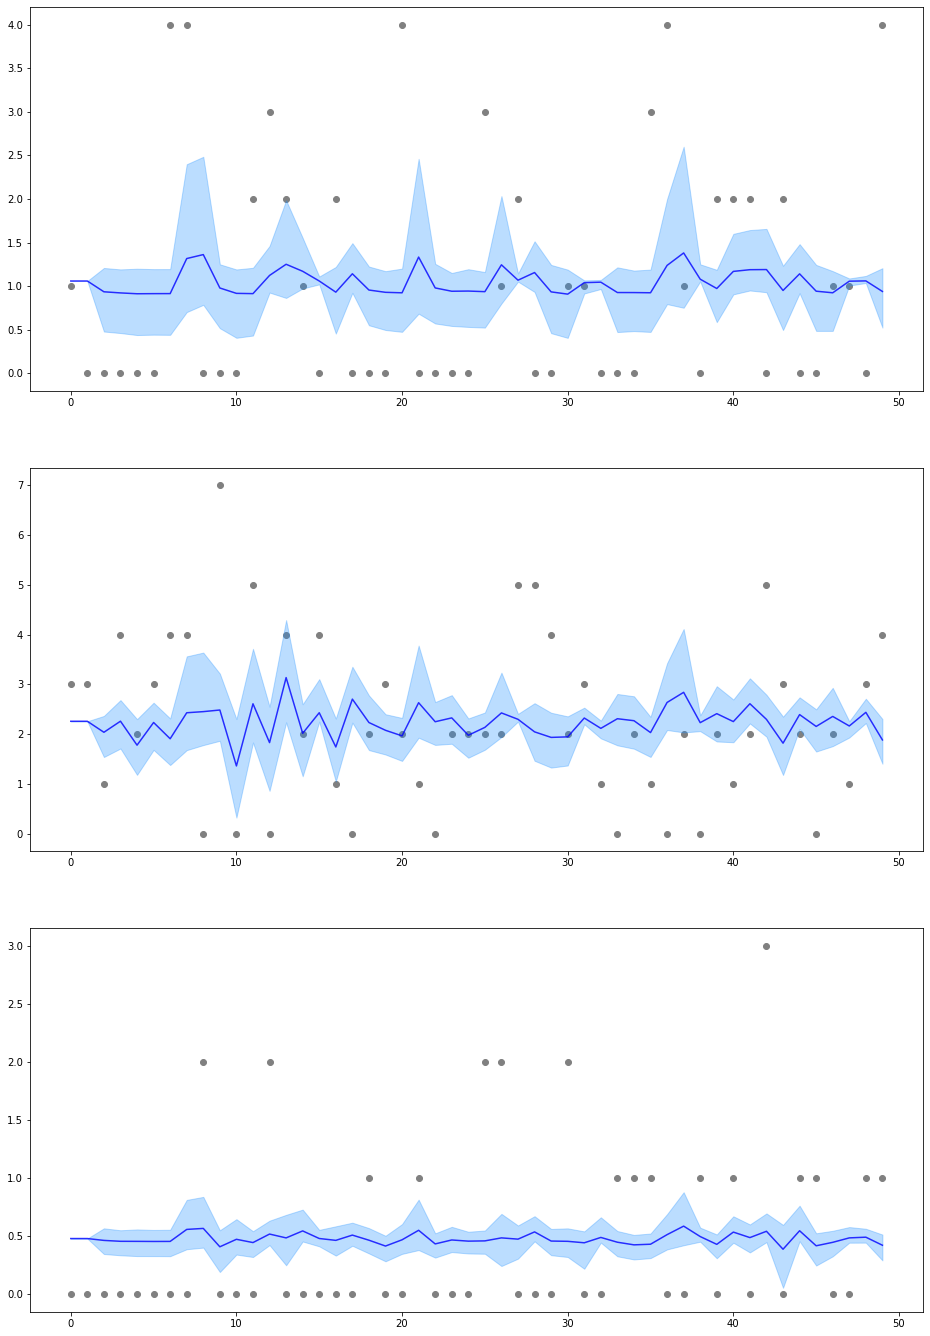

In [423]:
fig, axes = plt.subplots(num_of_series, 1, figsize=(16, 8 * num_of_series))
x = np.arange(0, num_of_steps)
for idx, ax in enumerate(axes):
    ax.scatter(x, raw_y[idx], c='grey')
    ax.plot(x, yhat_med[idx], color='blue', alpha=0.8);
    ax.fill_between(x=x, y1=yhat_lower[idx], y2=yhat_upper[idx], color='dodgerblue', alpha=0.3);

## Model Global Trend without Kalman Filter

This approach does not rely on Kalman filter to derive likelihood of global states.

In [425]:
ss_model_path = "../stan/ss_multivariate[1.1].stan"
compiled_path = compile_stan_model_simplified(ss_model_path)
ss_mod = get_compiled_stan_model_simplified(compiled_path)
del compiled_path

In [426]:
data = {
    'NUM_OF_STEPS': num_of_steps,
    'NUM_OF_SERIES': num_of_series,
    'Y' : y,
    'A1' : np.zeros(num_of_series),
    'P1' : np.zeros(num_of_series),
    'STATE_SIGMA_MEAN': np.ones(num_of_series),
    'STATE_SIGMA_SD': np.ones(num_of_series),
    'OBS_SIGMA_MEAN': np.ones(num_of_series),
    'OBS_SIGMA_SD':  np.ones(num_of_series),
    # global param
    'GLB_STATE_SIGMA_MEAN' : 1.0,
    'GLB_STATE_SIGMA_SD' : 1.0,
}

In [428]:
ss_fit = ss_mod.sampling(
    data=data,
    warmup=4000,
    iter=5000,
    chains=4,
    control={
        'adapt_delta': 0.9,
    }
)


Gradient evaluation took 0.000146 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.46 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000135 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.35 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)

Gradient evaluation took 0.000144 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.44 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000128 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.28 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration: 1000 / 5000 [

Iteration: 5000 / 5000 [100%]  (Sampling)

 Elapsed Time: 44.0958 seconds (Warm-up)
               36.2004 seconds (Sampling)
               80.2962 seconds (Total)



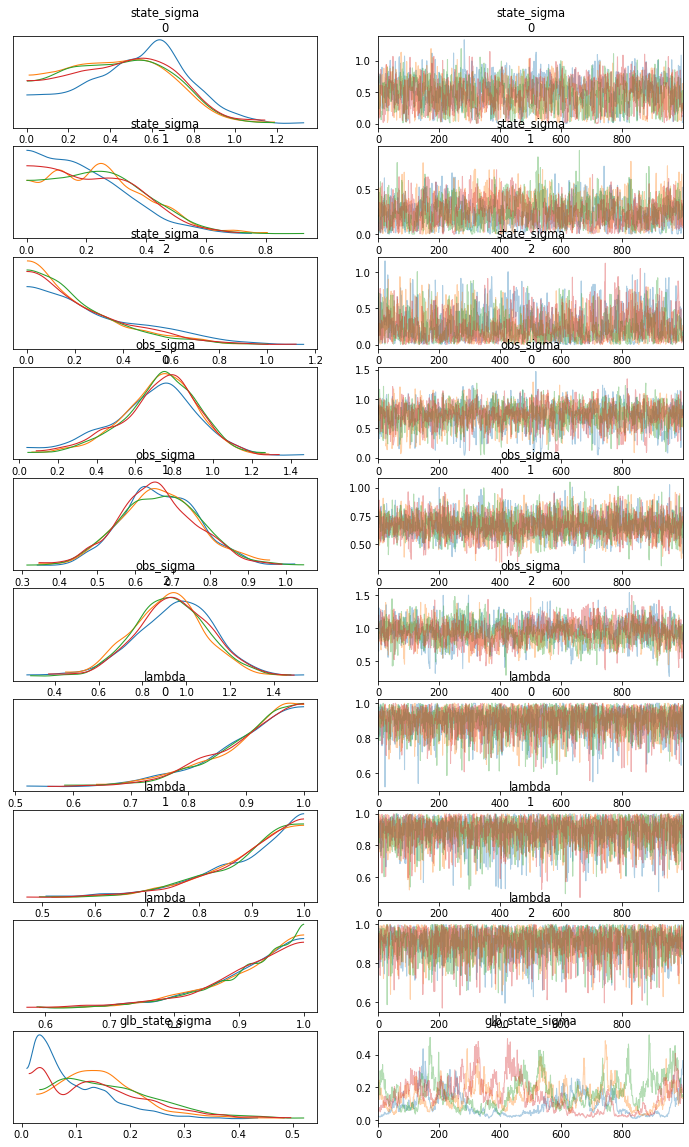

In [429]:
az_posteriors = az.from_pystan(ss_fit)
axes = az.plot_trace(az_posteriors, var_names=['state_sigma', 'obs_sigma', 'lambda', 'glb_state_sigma'], compact=False);

global states has mixture problem

In [437]:
ss_posteriors = ss_fit.extract(pars=['a', 'glb_a', 'lambda'], permuted=True)
loc_states = ss_posteriors['a'][:, :-1, :]
glb_states =  np.expand_dims(ss_posteriors['glb_a'][:, :-1], -1)
lambda_ = np.expand_dims(ss_posteriors['lambda'], 1)
states = loc_states + glb_states
yhat = np.power(np.clip(1 + lambda_ * states, a_min=0, a_max=np.inf), 1 / lambda_) * normalizer_y.reshape(1, 1, num_of_series)
yhat = yhat.transpose(0, 2, 1)
yhat_upper, yhat_med, yhat_lower = np.quantile(yhat, q=[0.9, 0.5, 0.1], axis=0)

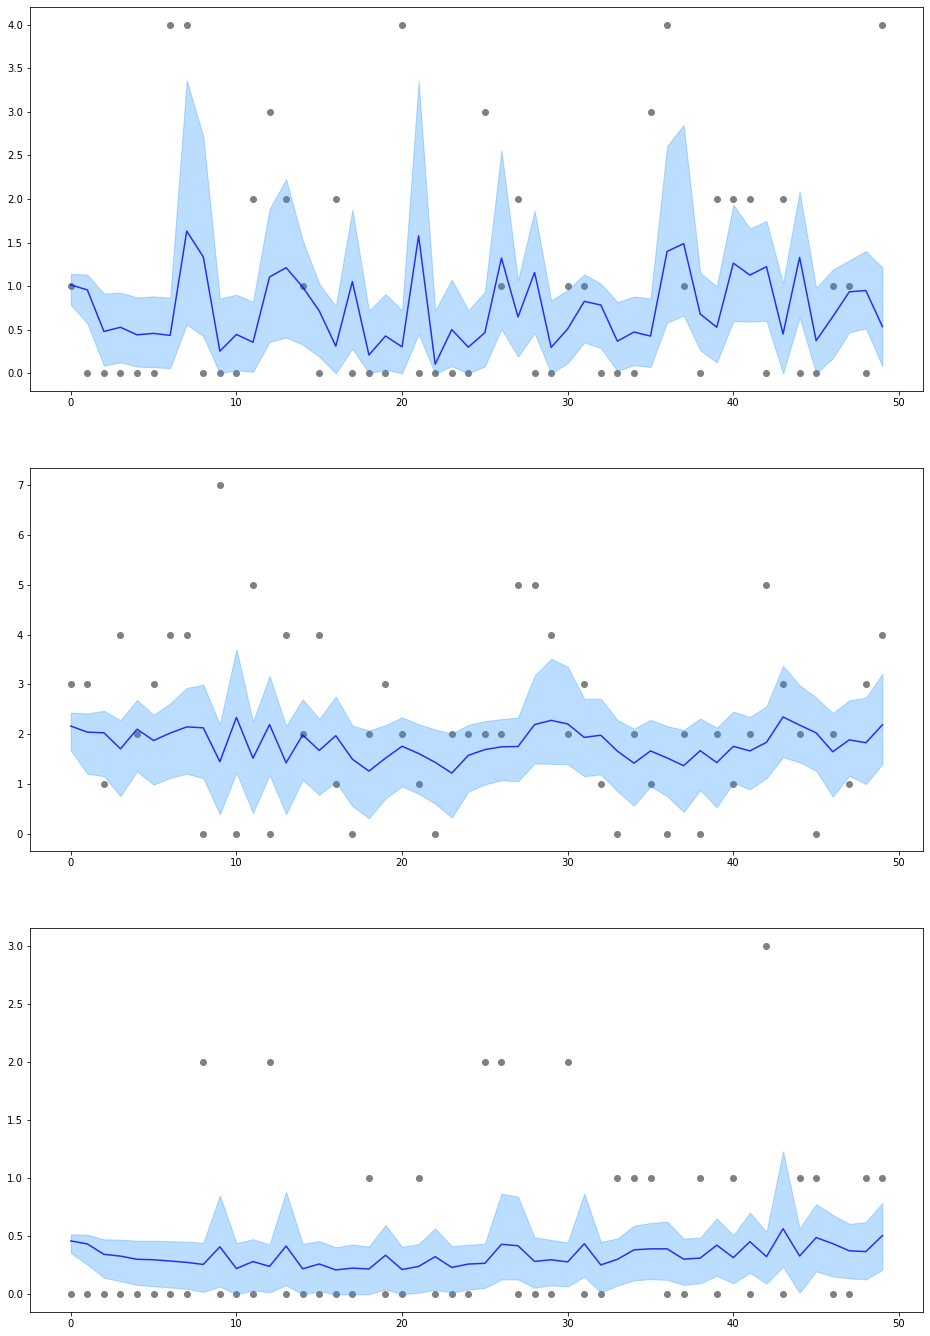

In [439]:
fig, axes = plt.subplots(num_of_series, 1, figsize=(16, 8 * num_of_series))
x = np.arange(0, num_of_steps)
for idx, ax in enumerate(axes):
    ax.scatter(x, raw_y[idx], c='grey')
    ax.plot(x, yhat_med[idx], color='blue', alpha=0.8);
    ax.fill_between(x=x, y1=yhat_lower[idx], y2=yhat_upper[idx], color='dodgerblue', alpha=0.3);

# Optimization 

Optimization seems not working properly.

In [453]:
ss_fit = ss_mod.optimizing(
    data=data,
)

Initial log joint probability = -372.168
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       62.6555       0.24889       60.8761       0.441       0.441       25   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      39       154.976       0.10684       186.238           1           1       49   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59       176.972    0.00786724       103.487           1           1       69   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       189.926      0.083403       225.778           1           1       90   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        236.32     0.0124628       458.978           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [454]:
loc_states = ss_fit['a'][:-1, :]
glb_states =  np.expand_dims(ss_fit['glb_a'][:-1], -1)
lambda_ = np.expand_dims(ss_fit['lambda'], 0)
states = loc_states + glb_states
yhat = np.power(np.clip(1 + lambda_ * states, a_min=0, a_max=np.inf), 1 / lambda_) * normalizer_y.reshape(1, num_of_series)

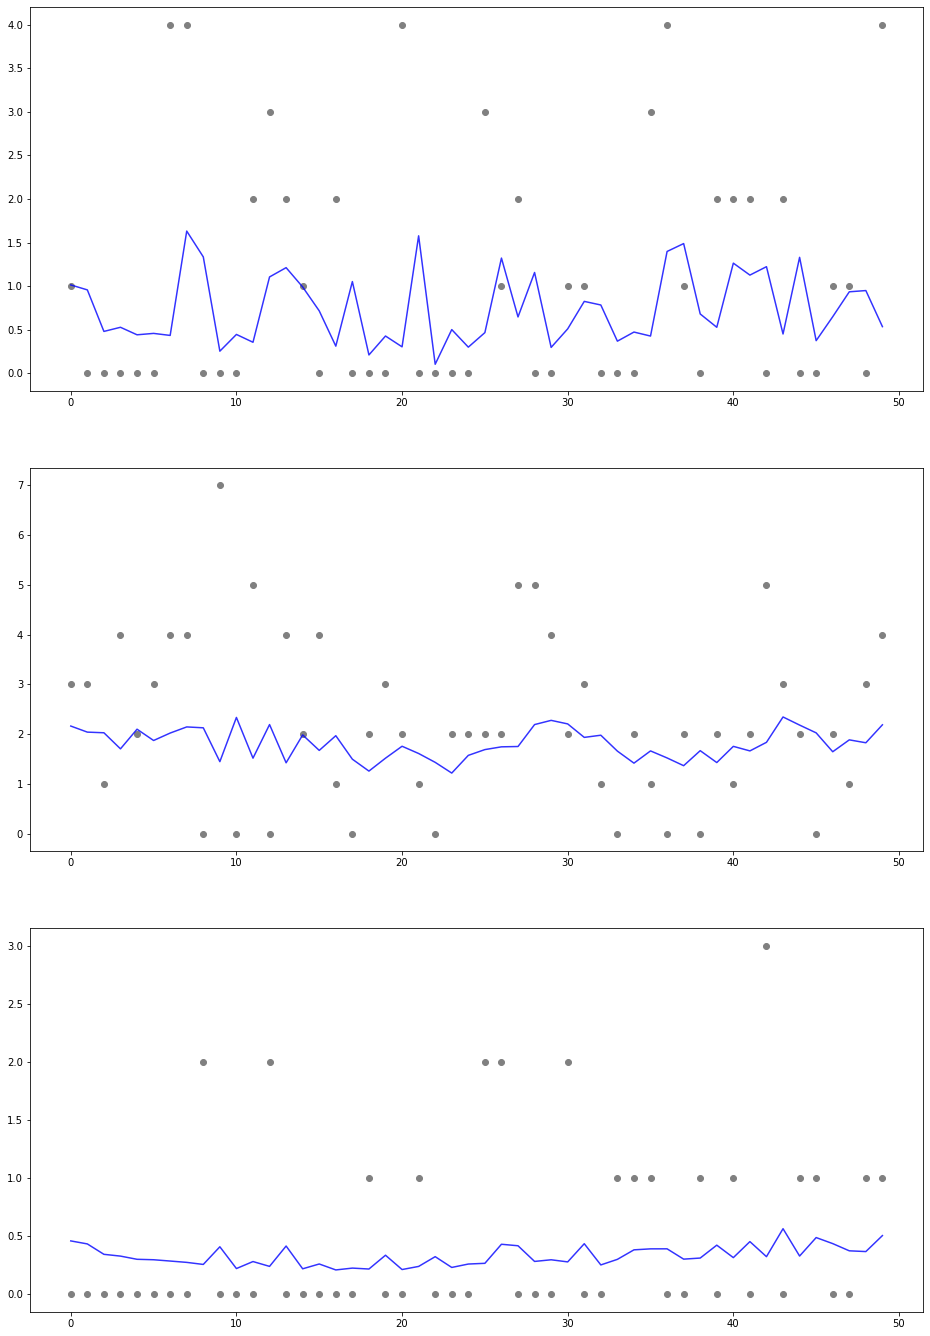

In [455]:
fig, axes = plt.subplots(num_of_series, 1, figsize=(16, 8 * num_of_series))
x = np.arange(0, num_of_steps)
for idx, ax in enumerate(axes):
    ax.scatter(x, raw_y[idx], c='grey')
    ax.plot(x, yhat_med[idx], color='blue', alpha=0.8);